1/1 [==============================] - 0s 36ms/step


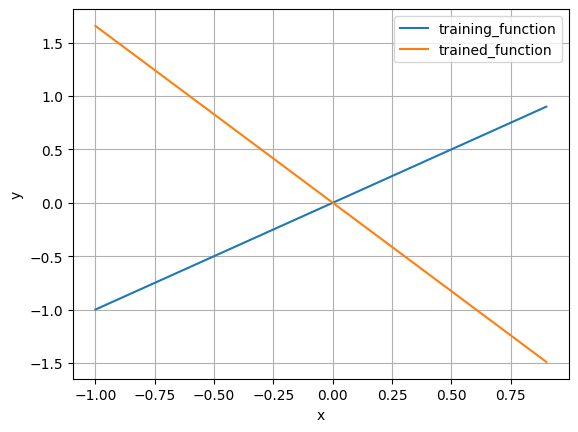

1/1 [==============================] - 0s 25ms/step


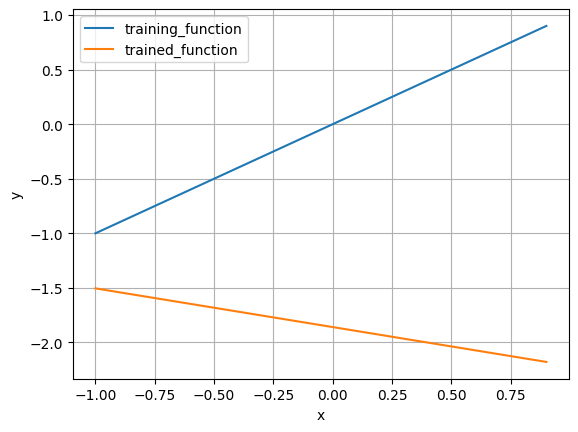

1/1 [==============================] - 0s 36ms/step loss: 3.4569 - mean_absolute_error: 1.8593 - root_mean_squared_error: 1.8593 - mean_absolute_percentage_error: 265.61


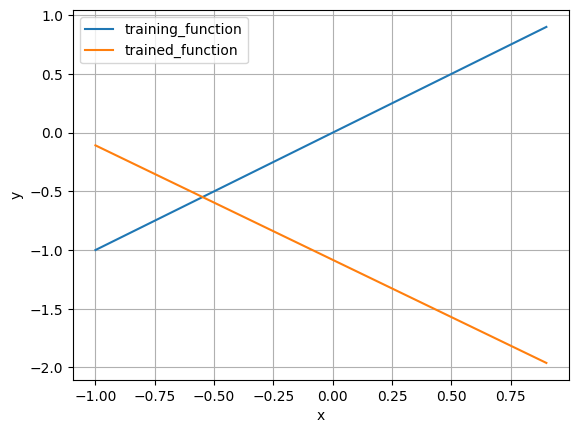

1/1 [==============================] - 0s 31ms/steploss: 2.0292 - mean_absolute_error: 1.3174 - root_mean_squared_error: 1.4245 - mean_absolute_percentage_error: 181.280


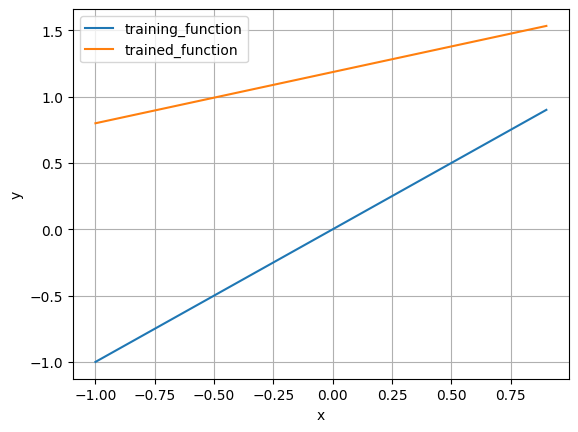

1/1 [==============================] - 0s 31ms/steploss: 3.0686 - mean_absolute_error: 1.6345 - root_mean_squared_error: 1.7517 - mean_absolute_percentage_error: 246.89


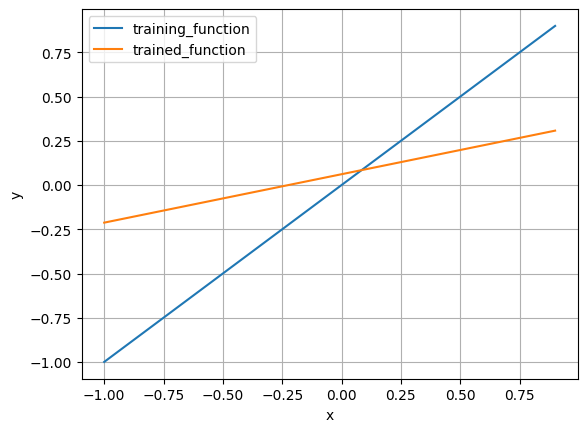

1/1 [==============================] - 0s 32ms/steploss: 2.6171 - mean_absolute_error: 1.5068 - root_mean_squared_error: 1.6177 - mean_absolute_percentage_error: 466.08


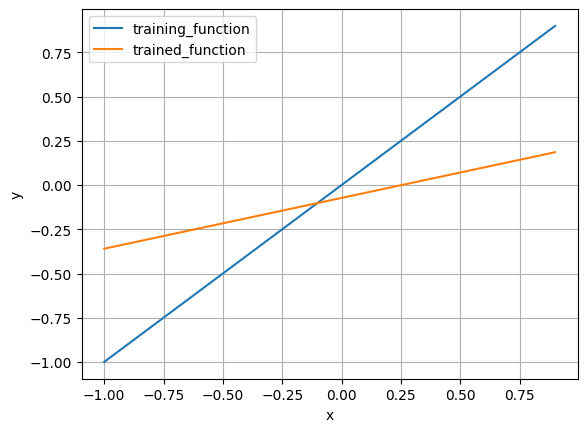

1/1 [==============================] - 0s 28ms/steploss: 2.0973 - mean_absolute_error: 1.2323 - root_mean_squared_error: 1.4482 - mean_absolute_percentage_error: 399.67


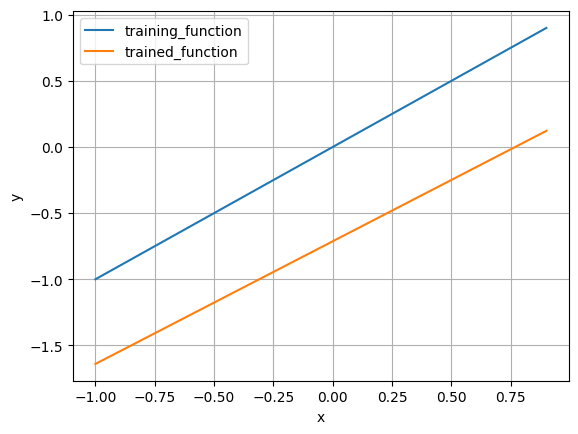

1/1 [==============================] - 0s 32ms/steploss: 1.8160 - mean_absolute_error: 1.1336 - root_mean_squared_error: 1.3476 - mean_absolute_percentage_error: 343.72


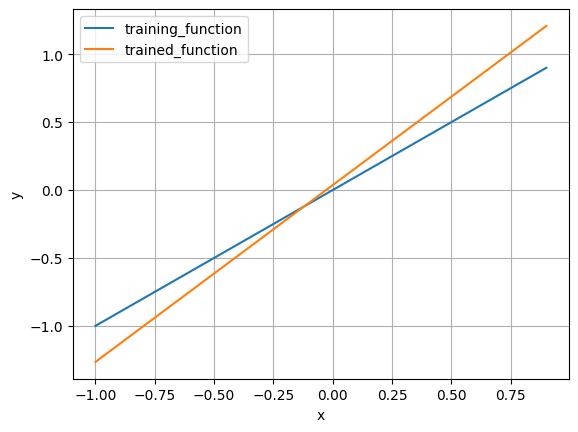

1/1 [==============================] - 0s 26ms/steploss: 1.6368 - mean_absolute_error: 1.0787 - root_mean_squared_error: 1.2794 - mean_absolute_percentage_error: 316.02


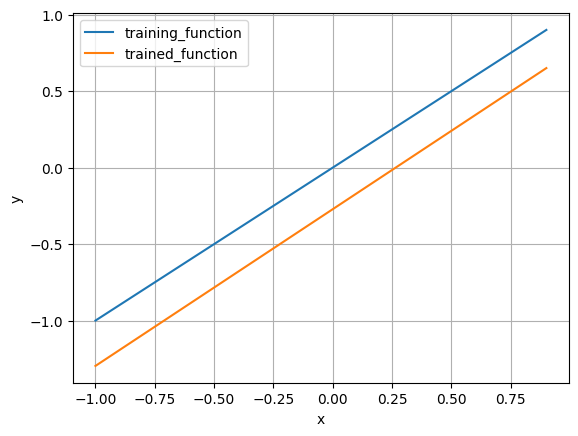

1/1 [==============================] - 0s 23ms/steploss: 1.4440 - mean_absolute_error: 0.9823 - root_mean_squared_error: 1.2017 - mean_absolute_percentage_error: 280.80


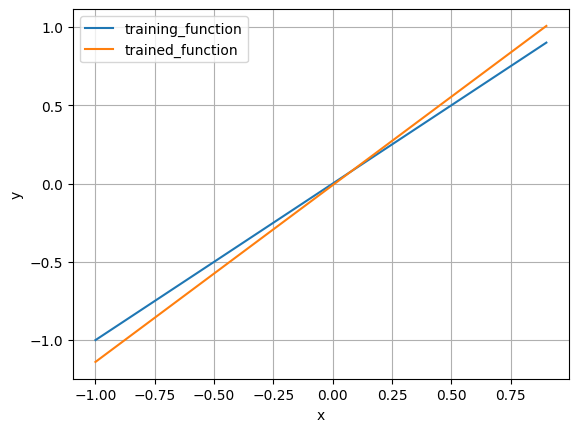

1/1 [==============================] - 0s 42ms/steploss: 1.2912 - mean_absolute_error: 0.9023 - root_mean_squared_error: 1.1363 - mean_absolute_percentage_error: 256.87


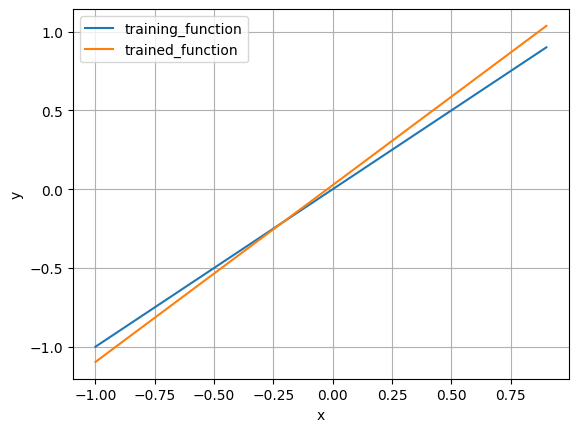

1/1 [==============================] - 0s 32ms/steploss: 1.1622 - mean_absolute_error: 0.8156 - root_mean_squared_error: 1.0781 - mean_absolute_percentage_error: 232.97


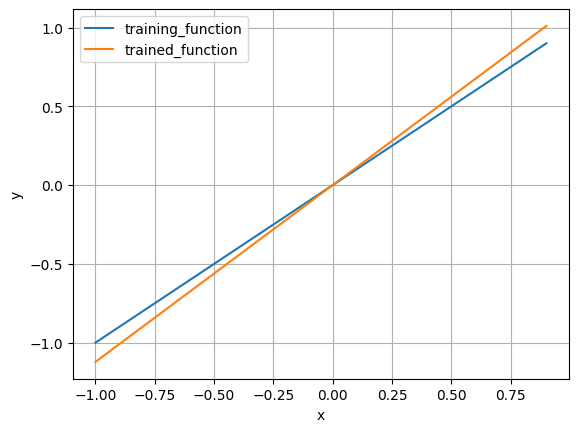

1/1 [==============================] - 0s 20ms/steploss: 1.0566 - mean_absolute_error: 0.7438 - root_mean_squared_error: 1.0279 - mean_absolute_percentage_error: 2353598.25


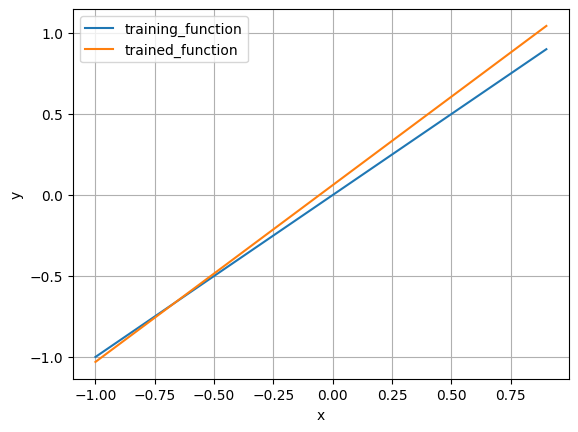

1/1 [==============================] - 0s 20ms/step


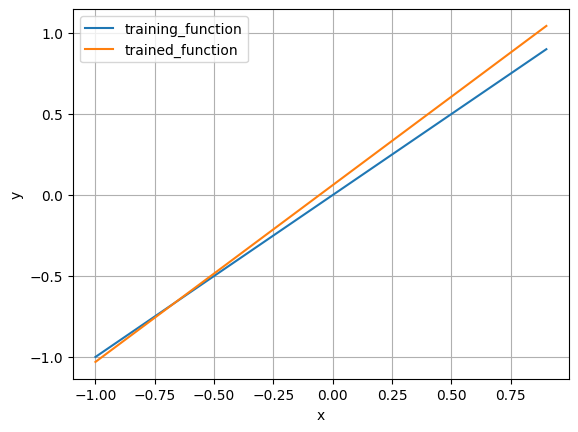

1/1 [==============================] - 0s 131ms/step - loss: 0.0024 - mean_absolute_error: 0.0382 - root_mean_squared_error: 0.0491 - mean_absolute_percentage_error: 11.9736
[0.0024065468460321426, 0.03821367770433426, 0.04905656725168228, 11.973615646362305]
1/1 [==============================] - 0s 25ms/step
[[0.6069982]]
[array([[1.0917127]], dtype=float32), array([0.06114185], dtype=float32)]


In [15]:
import tensorflow as tf
import tensorboard
import numpy as np
import matplotlib.pyplot as plt

def generate_train_data(f = lambda x: x, start = -1.0, end = 1.0, step = 0.1):
  x = np.arange(start, end, step)
  np.random.shuffle(x)
  y = f(x)
  return x, y

def split_data(x, y, test_size=0.2):
  assert len(x) == len(y)
  test_len = int(len(x)*test_size)
  train_len = len(x) - test_len
  x_train = x[:train_len]
  x_test = x[train_len:]
  y_train = y[:train_len]
  y_test = y[train_len:]
  return x_train, x_test, y_train, y_test

def plot_graph(functions, start=-1.0, end=1.0, step=0.1, title=''):
    x = np.arange(start, end, step)
    for f in functions:
        y = f(x)
        plt.plot(x, y, label=f.__name__)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.grid(True)
    plt.legend()  
    plt.show()

def training_function(x):
   return x

x, y = generate_train_data(training_function)
x_train, x_test, y_train, y_test = split_data(x, y)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=(1,)),
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)

metrics = ['mean_absolute_error', tf.keras.metrics.RootMeanSquaredError(), 'mean_absolute_percentage_error']

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=metrics)

def trained_function(x):
   return model.predict(np.reshape(x, (-1, 1)))

plot_graph([training_function, trained_function], -1.0, 1.0)

history = model.fit(x_train, y_train, batch_size=1, epochs=1, validation_split=0.2, callbacks=[tf.keras.callbacks.LambdaCallback(on_batch_end=lambda batch, logs: plot_graph([training_function, trained_function], -1.0, 1.0))])

plot_graph([training_function, trained_function], -1.0, 1.0)

print(model.evaluate(x_test, y_test))

prediction = model.predict(np.array([[0.5]]))
print(prediction)

weights = model.get_weights()
print(weights)